In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

In [5]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/identifikasi sayur dan buah/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 355 files belonging to 36 classes.


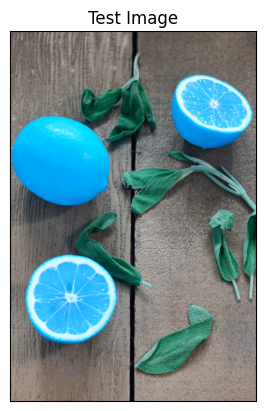

In [6]:
import cv2
image_path = '/content/drive/MyDrive/identifikasi sayur dan buah/test/lemon/Image_10.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 307ms/step


In [8]:
print(predictions[0])
print(max(predictions[0]))

[7.0658722e-15 5.6209754e-15 1.0423391e-12 8.2492573e-14 1.8349601e-12
 4.5165094e-16 9.2608324e-11 6.3892085e-15 4.8919088e-13 2.3544093e-13
 7.8428166e-13 1.4253478e-15 4.0134584e-13 7.0993818e-13 1.0134083e-11
 1.2352045e-12 3.7922821e-11 5.3686954e-13 1.6027631e-08 3.7671897e-13
 1.0000000e+00 7.1387872e-13 6.3001220e-14 3.2291247e-14 1.9878378e-12
 9.4927721e-14 1.9059108e-12 2.1844041e-12 3.5385540e-14 6.6543315e-14
 9.5045950e-12 1.3711162e-13 6.7374023e-12 4.7814668e-14 4.6591040e-13
 7.8521784e-15]
1.0


In [9]:
test_set.class_names

['anggur',
 'apel',
 'bawang',
 'bawang putih',
 'bayam',
 'belimbing',
 'bit',
 'delima',
 'jagung',
 'jahe',
 'jambu',
 'jambu biji',
 'jeruk',
 'kacang polong',
 'kedelai',
 'kelapa',
 'kembang kol',
 'kentang',
 'kiwi',
 'kubis',
 'lemon',
 'lobak',
 'lombok',
 'mangga',
 'melon',
 'nanas',
 'pepaya',
 'pir',
 'pisang',
 'selada',
 'semangka',
 'terong',
 'timun',
 'tomat',
 'ubi',
 'wortel']

In [10]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index)

(array([20]),)


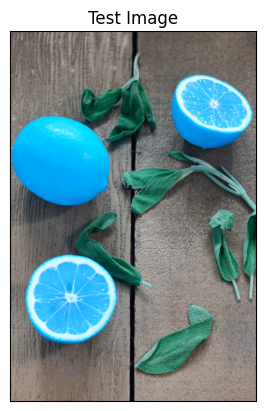

In [11]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
print("its a {}".format(test_set.class_names[result_index[0][0]]))

its a lemon
